<a href="https://colab.research.google.com/github/SidSolanki28/Predict-Sales-by-Advertising-Ads-Budget/blob/master/Advertising_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advertising Ads By Multiple Linear Regression

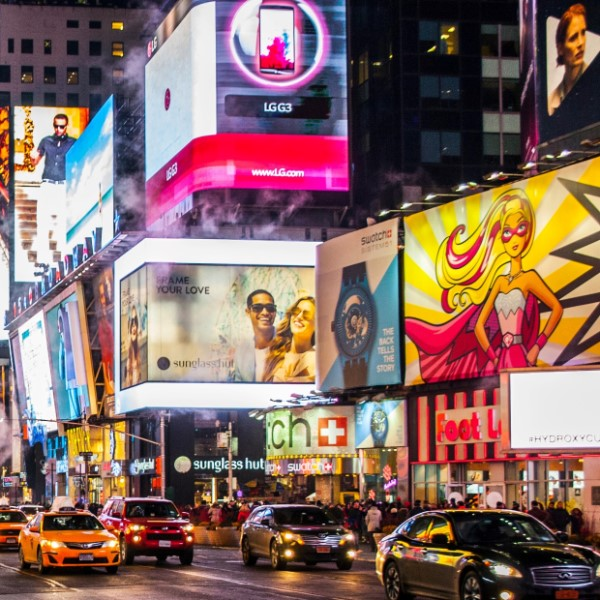

### Dataset Source

https://www.kaggle.com/ashydv/advertising-dataset

The main aim to predict sales for given budget spend on TV, Radio and Newspaper in dollars

# Importing Libraries

In [1]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset

In [2]:
raw_df = pd.read_csv("/content/datasets_133357_317184_advertising.csv")			# to import .csv file

In [3]:
df = raw_df.copy()			# copy of initial dataset

# Data Inspection

In [4]:
df.shape

(200, 4)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.info()			# for concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* All features and Target are float values
* There is no Nan or missing values in dataset

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


* There is huge spending on TV advertisement on an average 147,000 dollars and minimum on radio of 23,000 dollars


# Data Cleaning

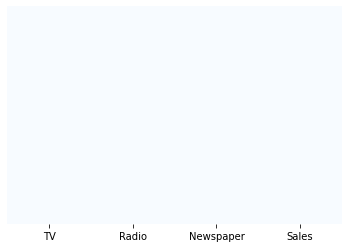

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

* There is no null values. Let's confirm

In [10]:
df.isnull().sum()			# to get total values in column

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Bam! Data is clean

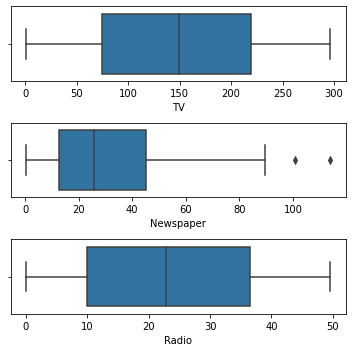

In [11]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in data

# Exploratory Data Analysis

Sales(Target)

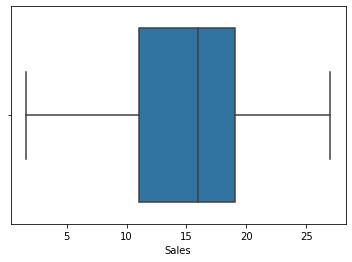

In [ ]:
sns.boxplot(df['Sales'])
plt.show()

* There is no outlier present in target Sales
* There is average sales of about 15,000 dollars

Features (Predictors)

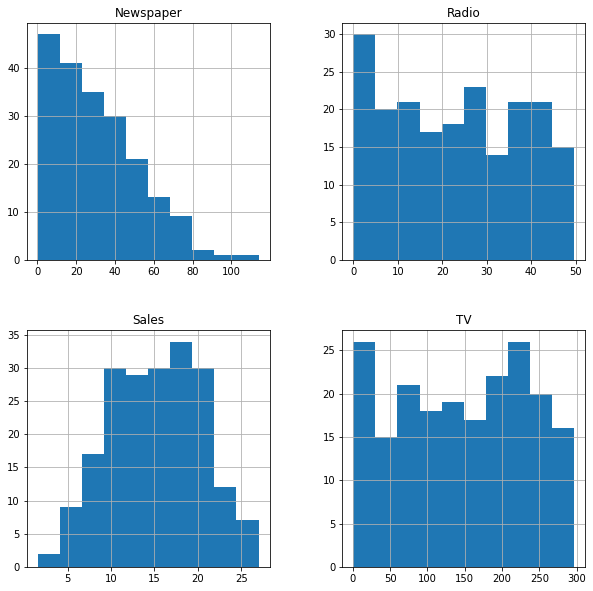

In [14]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

* Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


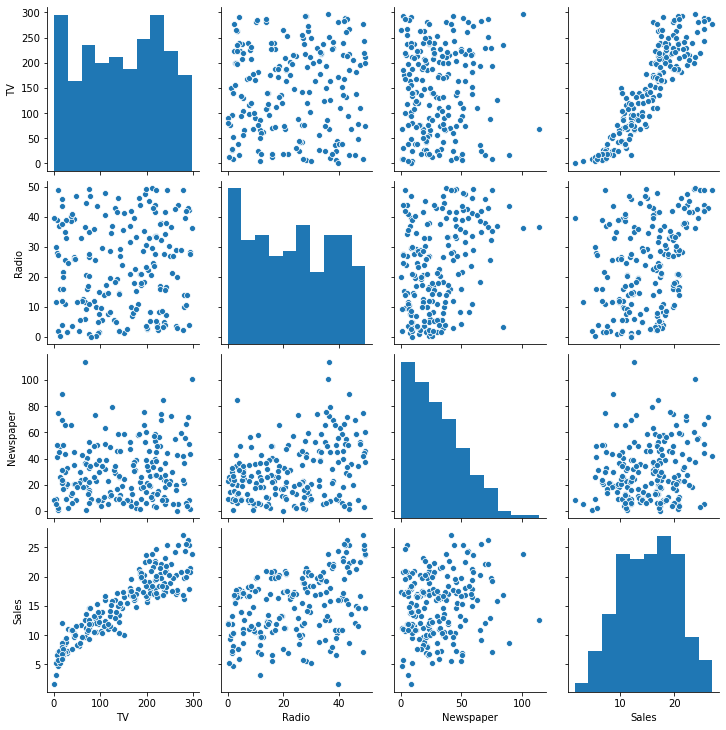

In [15]:
sns.pairplot(df, size=2.5)
plt.show()

* Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
* There is no correlation seems between all features.

Let's check with values.

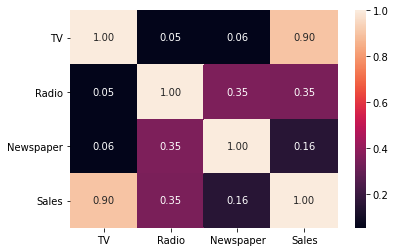

In [16]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

# Data Preprocessing 

In [17]:
### Define X&Y ###

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

# Model Training

In [19]:
### Simple Linear Regression/ Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.05450927 0.10094536 0.00433665]
Intercept : 4.714126402214131


# Model Prediction

In [21]:
y_pred = regressor.predict(X_test)

# Metrices

In [22]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.7052146229349234


In [23]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9059011844150825

# Tuning

**Estimate the relevancy of the coefficients**

Now that you have coefficients, how can you tell if they are relevant to predict your target?

The best way is to find the p-value. The p-value is used to quantify statistical significance; it allows to tell whether the null hypothesis is to be rejected or not.

The null hypothesis?

For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.

In [24]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           8.13e-99
Time:                        11:50:24   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

**P value**

Looking at all coefficients, we have a p-value that is very low (although it is probably not exactly 0) for TV and Radio. This means that there is a strong correlation between these coefficients and the target (Sales). 

Of course, we notice that the third coefficient (the one for newspaper) has a large p-value 0.954. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.

**R² value and Adj. R² value**

Then, looking at the R² value and Adj. R² value, we have 0.9. Therefore, about 90% of the variability of sales is explained by the amount spent on all ads

**F-statistic**

This is a good indicator of whether there is a relationship between Y and X. The further our F-statistic is away from 1, the better our regression model.The F-statistic is 605.4. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.

**std error**

The coefficient standard error, as mentioned above, measures how much our coefficient estimates vary from the actual average value of our response variable. In other words, it measures the accuracy of coefficient estimates. The closer our standard error is to zero, the better.

**t-value**

The coefficient t-value measures how far (in standard deviations) our coefficient estimate is from 0. A large t-value, relative to standard error, would provide evidence against the null hypothesis and indicate that a relationships exists between the predictor and response variables. Predictors with low t-statistics can be dropped. Ideally, the t-value should be greater than 1.96 for a p-value to be less than 0.05.